In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from heat_1d_2d import heat_1d_nn, heat_2d_nn

np.random.seed(238)
torch.manual_seed(301)

/workspaces/Project-3-Applied-ML/Archiv/Philipp/heat_1d_2d.py:157: SyntaxWarning: invalid escape sequence '\D'
  """


/tmp/ipykernel_3416/3818030810.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_3416/3818030810.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)


Epoch 0, Loss: 89.757103
Epoch 50, Loss: 70.341904
Epoch 100, Loss: 65.995750
Epoch 150, Loss: 63.324276
Epoch 200, Loss: 61.109112
Epoch 250, Loss: 58.906063
Epoch 300, Loss: 57.015583
Epoch 350, Loss: 55.323154
Epoch 400, Loss: 53.868626
Epoch 450, Loss: 52.491138
Epoch 500, Loss: 51.389233
Epoch 550, Loss: 50.290146
Epoch 600, Loss: 48.921963
Epoch 650, Loss: 48.251694
Epoch 700, Loss: 47.076717
Epoch 749, Loss: 46.395023
LBFGS Epoch 1, Loss: 32.556519
LBFGS Epoch 2, Loss: 30.524582
LBFGS Epoch 3, Loss: 5.895958
LBFGS Epoch 4, Loss: 1.360630
LBFGS Epoch 5, Loss: 0.301825
LBFGS Epoch 6, Loss: 0.100051
LBFGS Epoch 7, Loss: 0.040705
LBFGS Epoch 8, Loss: 0.024059
LBFGS Epoch 9, Loss: 0.015375
LBFGS Epoch 10, Loss: 0.010957


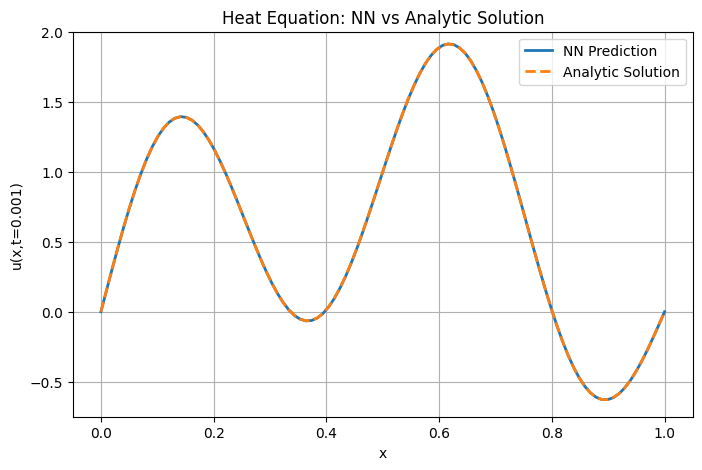

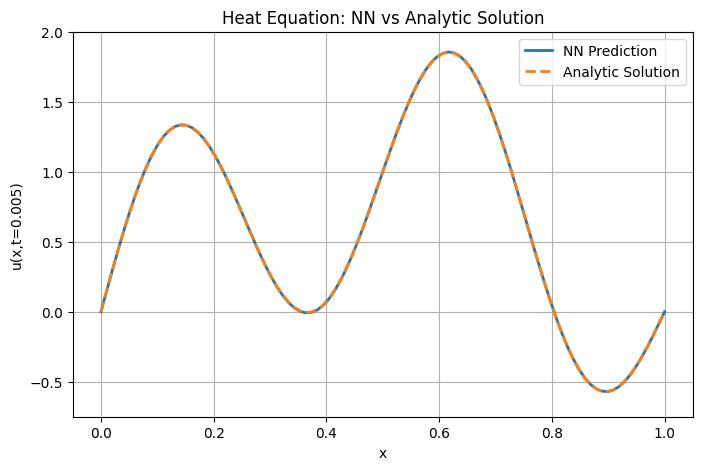

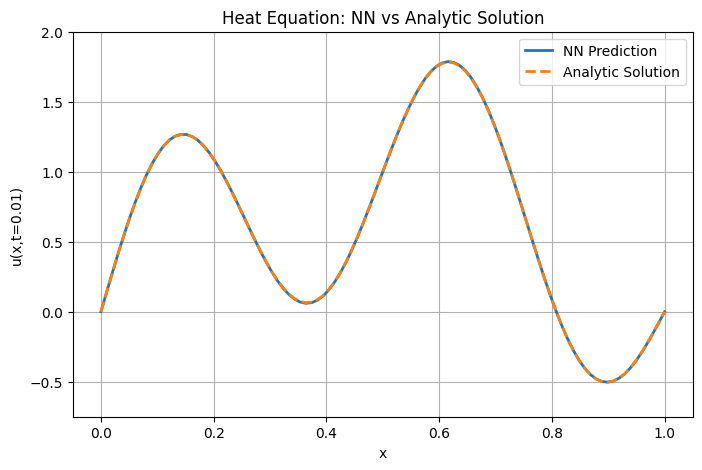

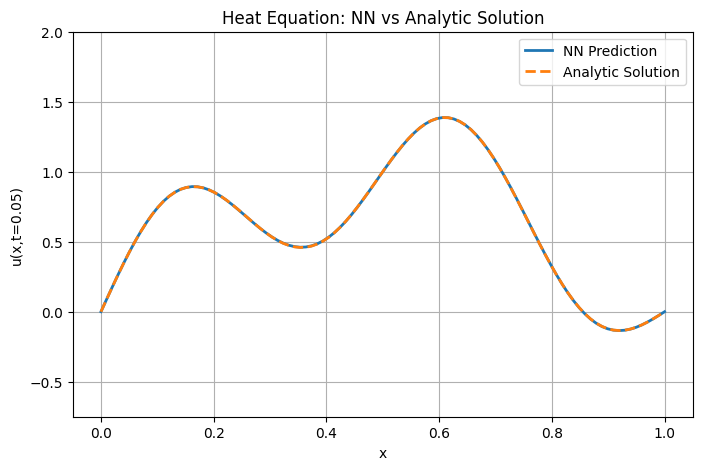

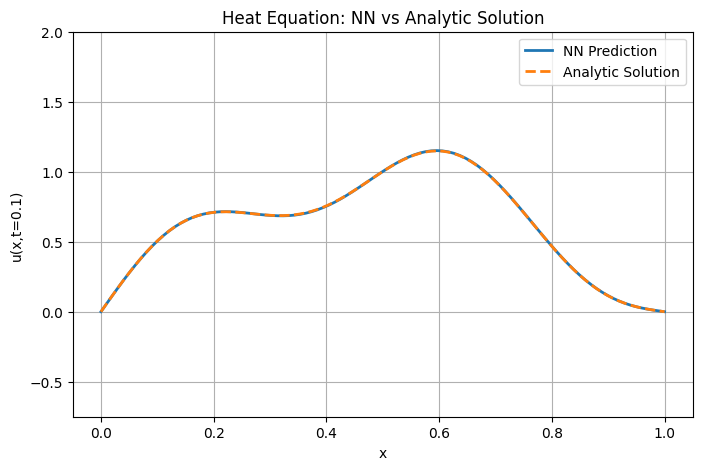

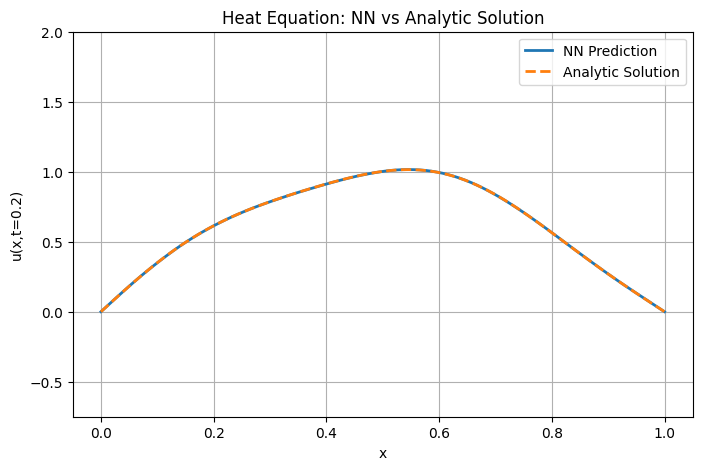

In [5]:
layers = [32, 64, 128, 128, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_1d_nn(layers, activations)

N_colloc = 100

x = np.linspace(0, 1, N_colloc)
t = np.linspace(0, 0.2, N_colloc)

xs, ts = np.meshgrid(x, t)

xs = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
ts = torch.tensor(ts, dtype=torch.float32).view(-1, 1)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

# gives relatively good results (compared to other parameters, still bad though)
pde_nn.train(x_colloc, t_colloc, lr=1e-2, weight_decay=0.0, epochs = 750, print_epochs=50)
# LBFGS needs approximately 100 epochs, 30 iterations for kappa = 1
# if kappa = 0.1, better choose more iterations, less epochs
pde_nn.train_lbfgs(x_colloc, t_colloc, lr=1, epochs=10, max_iter=100)

for t in [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, t_test).detach().numpy()


    #compare results with analytic solution

    x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
    t_val = t
    u_analytic = (1 - 1 / (0.1 * np.pi**2)) * np.sin(np.pi * x_np) * np.exp(-np.pi**2 * 0.1 * t_val
                    ) + np.sin(4 * np.pi * x_np) * np.exp(- 16 * np.pi**2 * 0.1 * t_val
                    ) + 1 / (0.1 * np.pi**2) * np.sin(np.pi * x_np) 

    # Plot the results
    plt.figure(figsize=(8,5))
    plt.plot(x_np, u_pred, label='NN Prediction', linewidth=2)
    plt.plot(x_np, u_analytic, '--', label='Analytic Solution', linewidth=2)
    plt.xlabel('x')
    plt.ylabel(f'u(x,t={t})')
    plt.ylim(-0.75, 2.0)
    plt.title('Heat Equation: NN vs Analytic Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
"""
2D Heat equation
"""

layers = [32, 64, 128, 128, 1]
activations = [torch.tanh]*(len(layers)-1) + [None]


N_colloc = 50

x = np.linspace(0, 1, N_colloc)
y = np.linspace(0, 1, N_colloc)
t = np.linspace(0, 1, N_colloc)

xs, ys, ts = np.meshgrid(x, y, t)

xs = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
ys = torch.tensor(ys, dtype=torch.float32).view(-1, 1)
ts = torch.tensor(ts, dtype=torch.float32).view(-1, 1)

x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
y_colloc = torch.tensor(ys, dtype=torch.float32).view(-1,1)
t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)

pde_nn = heat_2d_nn(layers, activations)

pde_nn.train(x_colloc, y_colloc, t_colloc, lr=1e-2, weight_decay=0, epochs = 1_000, print_epochs=50)
#proper result for epochs =5000
pde_nn.train_lbfgs(x_colloc, t_colloc, lr=1, epochs=20, max_iter=30)

x_test = torch.linspace(0,1,100).view(-1,1)
y_test = torch.linspace(0,1,100).view(-1,1)
t_test = torch.tensor([[0.001]]*100)  # t=0.001
u_pred = pde_nn.trial_solution(x_test, y_test, t_test).detach().numpy()


#compare results with analytic solution

x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
y_np = y_test.numpy().flatten()
t_val = 0.5
u_analytic = np.sin(np.pi * x_np) * np.sin(np.pi * y_np) * np.exp(
    -2 * np.pi**2 * t_val) + np.sin(2 * np.pi * x_np) * np.sin(4 * np.pi * x_np
    ) * np.exp(-20 * np.pi**2 * t_val)

/tmp/ipykernel_2528/3789127346.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_colloc = torch.tensor(xs, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_2528/3789127346.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_colloc = torch.tensor(ys, dtype=torch.float32).view(-1,1)
/tmp/ipykernel_2528/3789127346.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_colloc = torch.tensor(ts, dtype=torch.float32).view(-1,1)


: 